In [21]:
import psycopg2
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plot

In [13]:
try:
    conn = psycopg2.connect(database="Rodo_Car_Inventories", user="postgres", password="postgres",
                            host="localhost", port="5432")
except:
    print("connection to the database failed")

In [14]:
cur = conn.cursor()

In [15]:
postgreSQL_select_Query = f"""
    select dealership_id as dealer, 
        to_char(dealer_inventory_entry_date, 'YYYY-MM') as year_month,
        count(*) as count
    from dealer_data
    group by dealership_id, to_char(dealer_inventory_entry_date, 'YYYY-MM')
"""

cur.execute(postgreSQL_select_Query)
dealer_records = cur.fetchall()

In [16]:
dealer_records

[('dealership2', '2021-09', 4),
 ('dealership2', '2021-10', 20),
 ('dealership2', '2021-08', 3),
 ('dealership1', '2021-12', 21),
 ('dealership1', '2021-10', 4),
 ('dealership2', '2021-11', 20),
 ('dealership2', '2021-07', 1),
 ('dealership1', '2021-11', 24)]

In [49]:
dealer_df = pd.DataFrame(dealer_records)

In [50]:
# adding column name to the respective columns
dealer_df.columns =['Dealer', 'Year_Month', 'Car_Count']
  

In [51]:
dealer_df= dealer_df.sort_values('Year_Month')
dealer_df

,Dealer,Year_Month,Car_Count
6,dealership2,2021-07,1
2,dealership2,2021-08,3
0,dealership2,2021-09,4
1,dealership2,2021-10,20
4,dealership1,2021-10,4
5,dealership2,2021-11,20
7,dealership1,2021-11,24
3,dealership1,2021-12,21


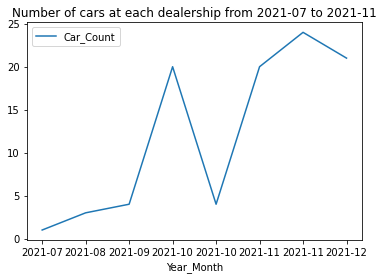

In [58]:
dealer_df.plot.line(x="Year_Month", title="Number of cars at each dealership from 2021-07 to 2021-11");

plot.show(block=True);

In [59]:
dealer_df.groupby("Dealer")

array([<AxesSubplot:xlabel='Year_Month'>,
       <AxesSubplot:xlabel='Year_Month'>], dtype=object)

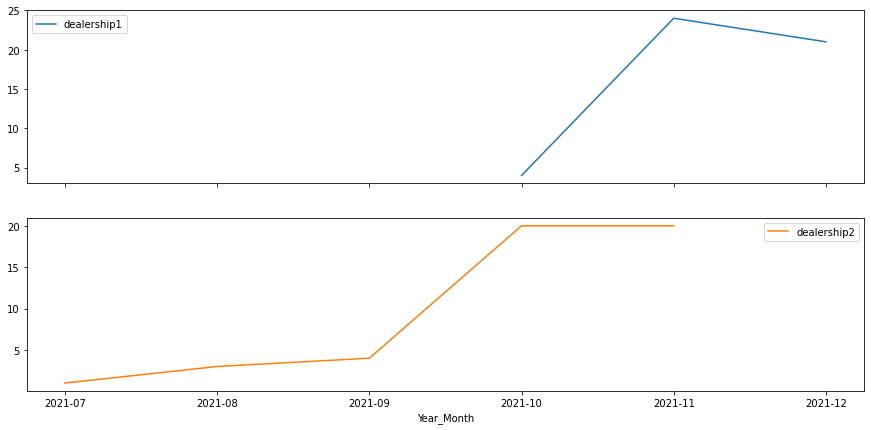

In [60]:

pd.pivot_table(dealer_df.reset_index(),
               index='Year_Month', columns='Dealer', values='Car_Count'
              ).plot(subplots=True, figsize=[15, 7])